In [51]:
using DrWatson
quickactivate("../../")
using Catalyst
using PGFPlotsX

Activating environment at `~/repos/advection-diffusion-catalysis/Project.toml`



## Model

The macro field is described by the following set of equation
$$\dfrac{\partial c}{\partial t} = \nabla \cdot (\boldsymbol{D} \nabla c) - \nabla \cdot (\boldsymbol{w} c)+R \quad \text{on} \quad \Omega$$
$$c(t) = \text{experiment}(t) \quad \text{on} \quad \partial\Omega$$

whereas the absorption term $R$ is defined as
$$R:=k\cdot c_{\Gamma}$$

and $c_{\Gamma}$ is the result of a computation that is based on a micro field $c_i$
$$c_{\Gamma} := \int_{\partial \Omega_i} \boldsymbol{D}_i \nabla c_i\cdot \boldsymbol{n} \text{ dA}$$

$c_i$ is obtained from a micro computation within each quadrature point, described by the following PDE
$$k_{\Gamma} \dfrac{\partial c_i}{\partial t} = \nabla \cdot (\boldsymbol{D}_i \nabla c_i) \quad \text{on} \quad \Omega_i$$
$$c_i(t) = c(t) \quad \text{on} \quad \partial\Omega_i$$

So, in total the same amount of parameters, i.e. $k_{\Gamma}, k, \boldsymbol{D_i}$, however the flexibility to discretize any kind of catalyst

Fitted with

| $D_i$        | $\approx 6\cdot 10^{-14}$ |
|--------------|---------------------------|
| $k$          | $3.21$                    |
| $k_{\Gamma}$ |  $9.6626$                 |


In [65]:
using PyCall
cma = pyimport("cma")
logger = cma.CMADataLogger(datadir("simulation/calibration/outcmaes-justSource-averagevelocity/")).load()
logger.plot_all()
logger.disp()

Iterat Nfevals  function value    axis ratio maxstd  minstd
    1      8 4.06881012764589e+01 1.0e+00 9.51e+00 7.83e+00
    2     16 3.26699777751165e+01 1.3e+00 7.38e+00 6.10e+00
   71    568 7.28014049312536e-02 1.3e+02 3.42e-02 3.50e-04
   72    576 7.27944278761363e-02 1.8e+02 2.66e-02 2.40e-04
   73    584 7.27947304096100e-02 2.0e+02 2.49e-02 2.11e-04
Iterat Nfevals  function value    axis ratio maxstd  minstd
   68    544 7.27943183437124e-02 1.1e+02 4.35e-02 5.73e-04


In [3]:
input_exp = []; output_exp = []
for row in CSV.File(datadir("experiment/new-data.csv"); delim=" ")
    push!(input_exp, row.I)
    push!(output_exp, row.O)
end

In [35]:
c_over_time, load_vector = Catalyst.solve(0.00636928, 3.2122695, 9.6626874, input_exp, output_exp);

macro-scale progress...100%|████████████████████████████| Time: 0:06:46


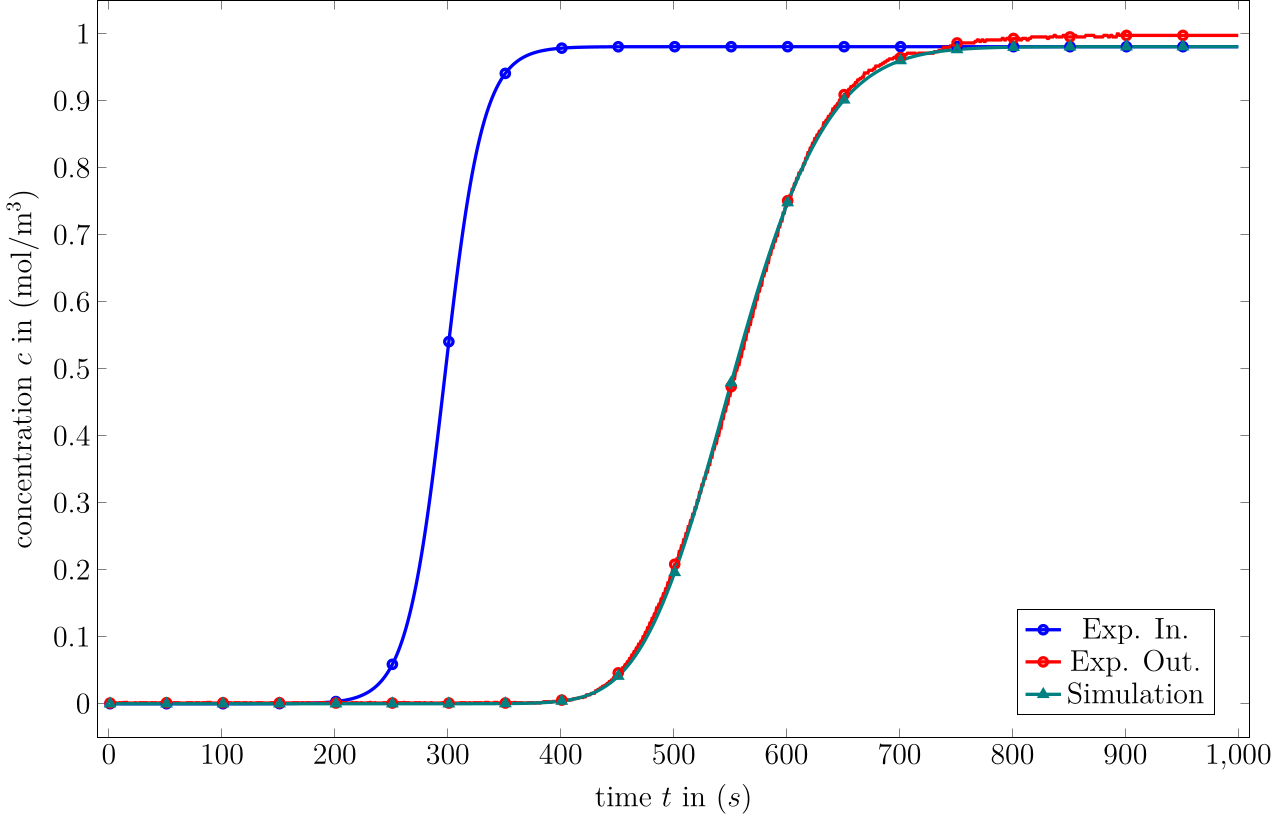

In [58]:
t_exp_in = Table([1:1000, input_exp[1:1000]]);
t_exp_out = Table([1:1000, output_exp[1:1000]]);
t_concentration = Table([1:1000, getindex.(c_over_time,101)]);
@pgf Axis({width=600, height=400, 
            xlabel="time \$t\$ in \$(s)\$",ylabel="concentration \$c\$ in (mol/m\$^3)\$",
            xlabel_style= {font = raw"\Large"},
            ylabel_style= {font = raw"\Large"},
            legend_style= {font = raw"\Large"},
            yticklabel_style= {font = raw"\Large"},
            xticklabel_style= {font = raw"\Large"},
            ymax=1.05, ymin=-0.05,
            xmax=1010, xmin=-10,
            xtick="{0,100,200,300,400,500,600,700,800,900,1000}",
            legend_pos="south east"},
        PlotInc({mark="o", mark_repeat=50, ultra_thick},
                t_exp_in),
        LegendEntry("Exp. In."),
        PlotInc({mark="o", mark_repeat=50, ultra_thick},
                t_exp_out),
        LegendEntry("Exp. Out."),
        PlotInc({mark="triangle", mark_repeat=50, color="teal", ultra_thick}, t_concentration),
        LegendEntry("Simulation"),
    )

Creating a gif...100%|██████████████████████████████████| Time: 0:00:19
┌ Info: Saved animation to 
│   fn = /home/max/repos/advection-diffusion-catalysis/notebooks/meeting-1704-2020/cMultiscalePDE.gif
└ @ Plots /home/max/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/max/repos/advection-diffusion-catalysis/notebooks/meeting-1704-2020/cMultiscalePDE.gif")
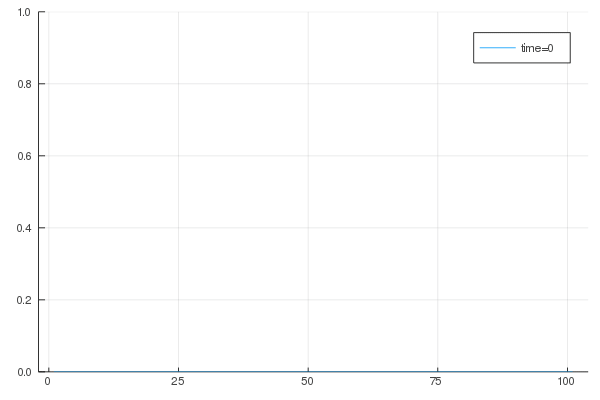

In [56]:
Catalyst.plotAnimation(c_over_time, "cMultiscalePDE.gif")

![Animation](cMultiscalePDE.gif)